In [1]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']

In [2]:
def cleaningData(file):
    data = pd.read_csv('{}'.format(file), encoding='gbk')
    score = []
    for i in data['比分'].tolist():
        score.append(i.replace('月', '-').replace('日', ''))
    listScore = []
    for i in score:
        a = i.split('-', 1)[0]
        b = i.split('-', 1)[1]
        if a == b:
            listScore.append(0)
        elif a > b:
            listScore.append(1)
        elif a < b:
            listScore.append(-1)
    data['score'] = listScore
    data['score'].astype(int)
    homeRank = data['主场排名'].astype(str).tolist()
    awayRank = data['客场排名'].astype(str).tolist()
    rankHome = []
    rankAway = []
    for i in homeRank:
        rankHome.append(i.replace('英冠', ''))
    for i in awayRank:
        rankAway.append(i.replace('英冠', ''))
    data['主场排名'] = rankHome
    data['客场排名'] = rankAway
    data['rankD'] = data['主场排名'].astype(int) - data['客场排名'].astype(int)
    rankD = []
    for i in data['rankD'].tolist():
        if i < 0:
            i = -i
        rankD.append(i)
    data['rankD'] = rankD
    data = data[['主场排名', '客场排名', 'rankD', '初盘_胜率_主', '初盘_胜率_和', '初盘_胜率_客']].astype(float)
    data = data.apply(lambda x : (x-np.min(x))/(np.max(x)-np.min(x)))
    data['score'] = listScore
    return data

In [3]:
def mapping(data):
    sns.pairplot(data, vars=['初盘_胜率_主', '初盘_胜率_和', '初盘_胜率_客'],diag_kind= 'kde',hue ='score',kind= 'reg')
    sns.relplot(x="主场排名",y="客场排名",hue='score',data=data,kind='line')


In [4]:
def svmTrain(data):
    x = data[['主场排名', '客场排名', 'rankD', '初盘_胜率_主', '初盘_胜率_和', '初盘_胜率_客']].values
    y = data['score'].values
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    svm_model = SVC(kernel='rbf',C=7,random_state=10).fit(X_train,y_train)
    pred1 = svm_model.predict(X_train)
    accuracy1 = accuracy_score(y_train, pred1)
    print('在训练集上的精确度: %.4f' % accuracy1)
    pred2 = svm_model.predict(X_test)
    accuracy2 = accuracy_score(y_test, pred2)
    print('在测试集上的精确度: %.4f' % accuracy2)

          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.684211  0.368421  0.277778  0.399320  0.922708  0.408698      0
1     0.684211  0.368421  0.277778  0.413667  0.886222  0.403622      0
2     0.684211  0.368421  0.277778  0.418953  0.855017  0.406777      0
3     0.684211  0.368421  0.277778  0.414548  0.831973  0.418164      0
4     0.210526  0.526316  0.277778  0.466650  0.907345  0.339827      0
...        ...       ...       ...       ...       ...       ...    ...
1512  0.210526  0.842105  0.611111  0.696954  0.689870  0.150912      1
1513  0.473684  0.105263  0.333333  0.270325  0.811330  0.581287     -1
1514  0.473684  0.105263  0.333333  0.218726  0.734037  0.659624     -1
1515  0.473684  0.105263  0.333333  0.203121  0.782525  0.662780     -1
1516  0.473684  0.105263  0.333333  0.255726  0.831973  0.591302     -1

[1517 rows x 7 columns]
在训练集上的精确度: 0.5985
在测试集上的精确度: 0.5658
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0  

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.5970
在测试集上的精确度: 0.5329
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.105263  0.789474  0.666667  0.419537  0.844615  0.428385      1
1     0.105263  0.789474  0.666667  0.411433  0.826154  0.443427      1
2     0.105263  0.789474  0.666667  0.390738  0.955385  0.425605      1
3     0.105263  0.789474  0.666667  0.403184  0.931795  0.419065      1
4     0.473684  0.368421  0.055556  0.191027  0.846667  0.685906      1
...        ...       ...       ...       ...       ...       ...    ...
1514  0.210526  0.842105  0.611111  0.756585  0.601026  0.125245      1
1515  0.473684  0.947368  0.444444  0.652098  0.710769  0.208306      1
1516  0.473684  0.947368  0.444444  0.600434  0.762564  0.250164      1
1517  0.473684  0.947368  0.444444  0.626194  0.775385  0.216808      1
1518  0.473684  0.947368  0.444444  0.615630  0.797436  0.221714      1

[1519 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6156
在测试集上的精确度: 0.6053
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.315789  0.631579  0.315789  0.772857  0.552189  0.099648      1
1     0.315789  0.631579  0.315789  0.804957  0.481481  0.086440      1
2     0.315789  0.631579  0.315789  0.751185  0.572872  0.116818      1
3     0.315789  0.631579  0.315789  0.786537  0.512266  0.097006      1
4     0.842105  0.578947  0.263158  0.434241  0.856662  0.373643     -1
...        ...       ...       ...       ...       ...       ...    ...
1515  0.684211  0.631579  0.052632  0.565488  0.756133  0.262107     -1
1516  0.000000  0.578947  0.578947  0.946228  0.263588  0.000000      1
1517  0.000000  0.578947  0.578947  0.938914  0.152958  0.041385      1
1518  0.000000  0.578947  0.578947  0.980360  0.060606  0.024802      1
1519  0.000000  0.578947  0.578947  0.959637  0.060125  0.047549      1

[1520 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6406
在测试集上的精确度: 0.6250
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.789474  0.157895  0.611111  0.868514  0.333168  0.056123     -1
1     0.789474  0.157895  0.611111  0.823329  0.425659  0.077646     -1
2     0.789474  0.157895  0.611111  0.834625  0.376430  0.079417     -1
3     0.789474  0.157895  0.611111  0.829765  0.312780  0.102030     -1
4     0.842105  0.315789  0.500000  0.450151  0.782695  0.366844     -1
...        ...       ...       ...       ...       ...       ...    ...
1515  0.052632  0.315789  0.222222  0.715224  0.584784  0.146165      1
1516  0.473684  0.263158  0.166667  0.419546  0.783690  0.398311     -1
1517  0.473684  0.263158  0.166667  0.442533  0.723023  0.391227     -1
1518  0.473684  0.263158  0.166667  0.422698  0.764794  0.400354     -1
1519  0.473684  0.263158  0.166667  0.467884  0.729985  0.362893     -1

[1520 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6069
在测试集上的精确度: 0.6151
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.157895  0.210526  0.000000  0.653786  0.581557  0.215580      1
1     0.157895  0.210526  0.000000  0.669839  0.641547  0.177042      1
2     0.157895  0.210526  0.000000  0.648103  0.544373  0.234519      1
3     0.157895  0.210526  0.000000  0.624094  0.710957  0.206851      1
4     0.105263  0.473684  0.333333  0.345362  0.791274  0.503623     -1
...        ...       ...       ...       ...       ...       ...    ...
1515  0.473684  0.263158  0.166667  0.255434  0.719881  0.631423      1
1516  0.263158  0.789474  0.500000  0.828101  0.340109  0.093709      1
1517  0.263158  0.789474  0.500000  0.750249  0.485870  0.135540      1
1518  0.263158  0.789474  0.500000  0.734906  0.404065  0.180336      1
1519  0.263158  0.789474  0.500000  0.829095  0.319782  0.099144      1

[1520 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.5806
在测试集上的精确度: 0.6217
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.157895  0.000000  0.111111  0.273562  0.778727  0.547204      1
1     0.157895  0.000000  0.111111  0.186901  0.767331  0.640642      1
2     0.157895  0.000000  0.111111  0.294862  0.736467  0.537237      1
3     0.157895  0.000000  0.111111  0.292865  0.773979  0.528378      1
4     0.000000  0.578947  0.555556  0.365149  0.836182  0.434939     -1
...        ...       ...       ...       ...       ...       ...    ...
1515  0.736842  0.578947  0.111111  0.402822  0.771130  0.414867     -1
1516  0.526316  0.473684  0.000000  0.568291  0.695632  0.264812      0
1517  0.526316  0.473684  0.000000  0.570554  0.735043  0.251107      0
1518  0.526316  0.473684  0.000000  0.560304  0.716049  0.267165      0
1519  0.526316  0.473684  0.000000  0.559372  0.735518  0.262458      0

[1520 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6456
在测试集上的精确度: 0.5954
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.052632  0.421053  0.352941  0.726616  0.579507  0.104322      1
1     0.052632  0.421053  0.352941  0.743315  0.448197  0.127323      1
2     0.052632  0.421053  0.352941  0.776712  0.392410  0.109898      1
3     0.052632  0.421053  0.352941  0.784949  0.418975  0.093401      1
4     0.473684  0.105263  0.352941  0.213472  0.774953  0.572839     -1
...        ...       ...       ...       ...       ...       ...    ...
1514  0.789474  1.000000  0.176471  0.720524  0.588615  0.107807      0
1515  0.578947  0.631579  0.000000  0.511565  0.704744  0.287291      1
1516  0.578947  0.631579  0.000000  0.508519  0.764326  0.272305      1
1517  0.578947  0.631579  0.000000  0.498477  0.803416  0.270678      1
1518  0.578947  0.631579  0.000000  0.498477  0.829981  0.262546      1

[1519 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6444
在测试集上的精确度: 0.6283
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.052632  0.000000  0.000000  0.926702  0.156011  0.039807      1
1     0.052632  0.000000  0.000000  0.906809  0.231604  0.037211      1
2     0.052632  0.000000  0.000000  0.916874  0.237234  0.025219      1
3     0.052632  0.000000  0.000000  0.973475  0.096100  0.009395      1
4     0.473684  0.000000  0.444444  0.058970  0.398874  0.871059     -1
...        ...       ...       ...       ...       ...       ...    ...
1515  0.473684  0.894737  0.388889  0.510953  0.713309  0.302386      1
1516  0.526316  0.947368  0.388889  0.410184  0.785686  0.385462     -1
1517  0.526316  0.947368  0.388889  0.440971  0.712103  0.375819     -1
1518  0.526316  0.947368  0.388889  0.403789  0.784479  0.392508     -1
1519  0.526316  0.947368  0.388889  0.401421  0.771210  0.399184     -1

[1520 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6209
在测试集上的精确度: 0.5559
          主场排名      客场排名     rankD   初盘_胜率_主   初盘_胜率_和   初盘_胜率_客  score
0     0.157895  0.368421  0.210526  0.190465  0.659802  0.657714     -1
1     0.157895  0.368421  0.210526  0.148206  0.549835  0.736380     -1
2     0.157895  0.368421  0.210526  0.192632  0.694399  0.644603     -1
3     0.157895  0.368421  0.210526  0.181315  0.625618  0.677953     -1
4     0.684211  0.526316  0.157895  0.343487  0.834020  0.442082      1
...        ...       ...       ...       ...       ...       ...    ...
1513  1.000000  0.842105  0.157895  0.349386  0.851318  0.430499      1
1514  0.210526  0.315789  0.105263  0.516013  0.695222  0.302571     -1
1515  0.210526  0.315789  0.105263  0.513605  0.677100  0.310718     -1
1516  0.210526  0.315789  0.105263  0.493860  0.723229  0.317210     -1
1517  0.210526  0.315789  0.105263  0.498314  0.731878  0.309954     -1

[1518 rows x 7 columns]


D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


在训练集上的精确度: 0.6318
在测试集上的精确度: 0.5822


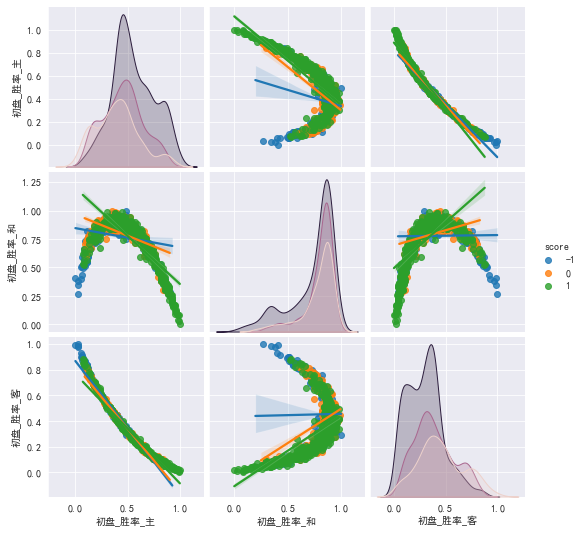

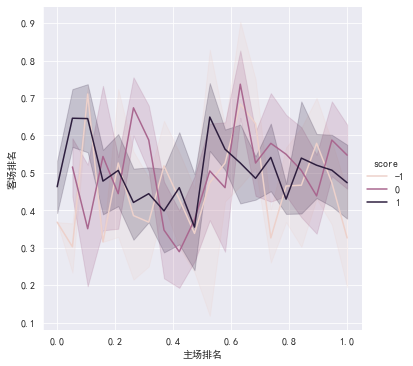

D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


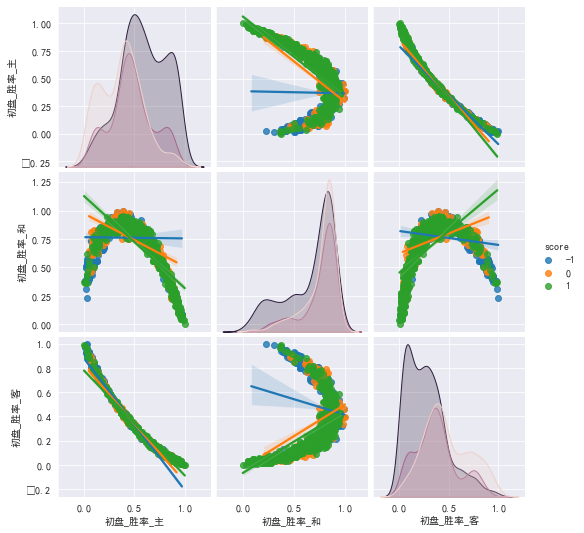

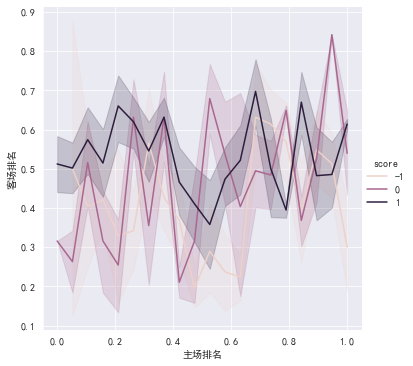

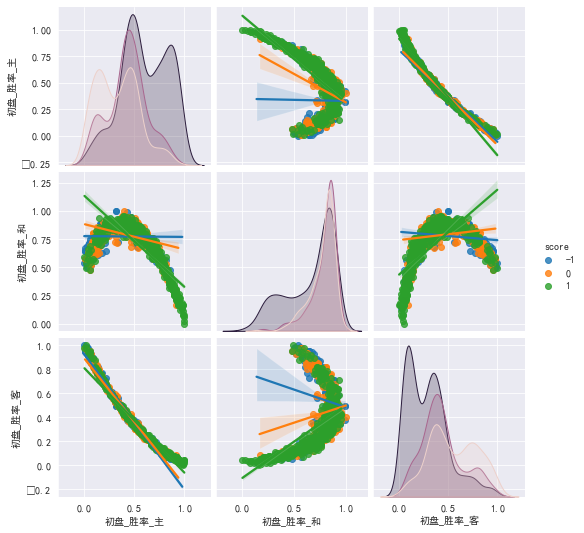

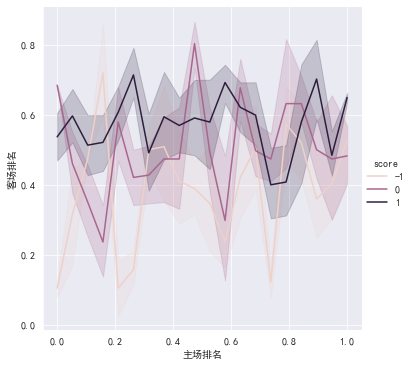

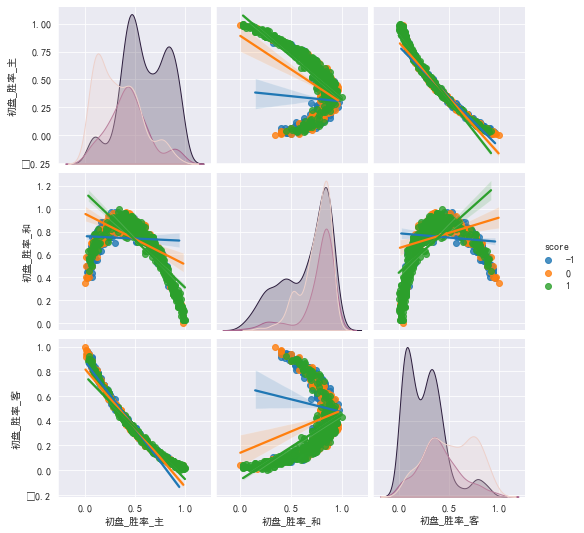

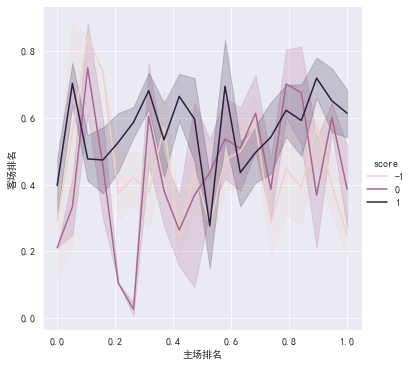

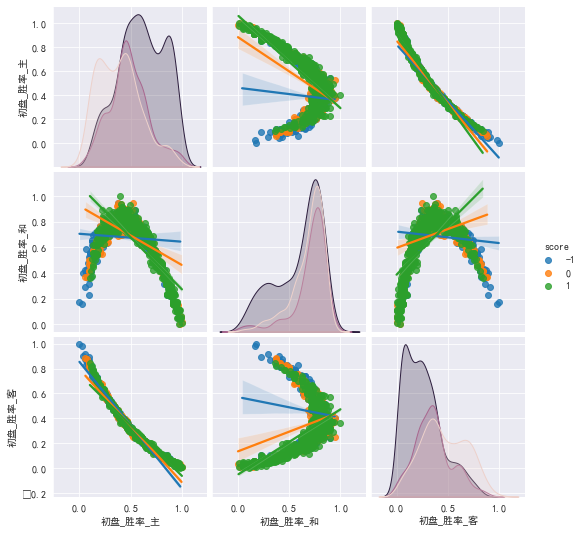

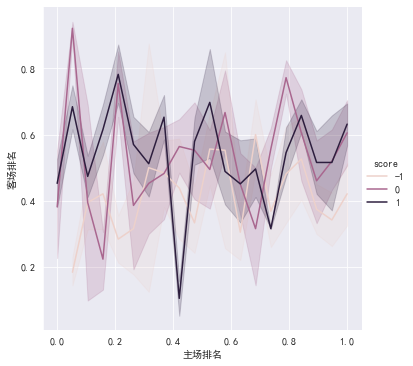

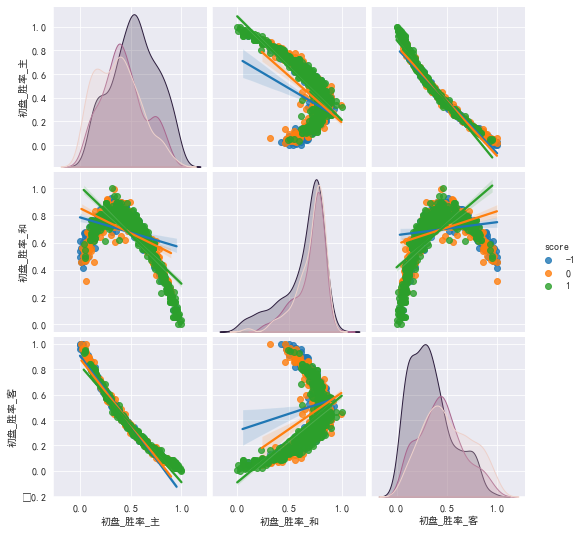

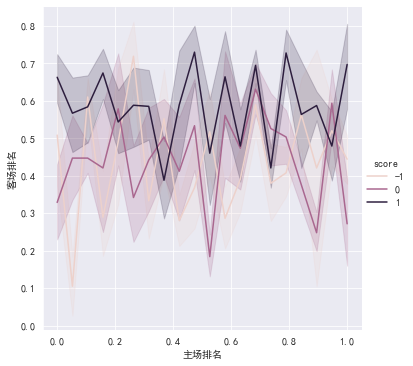

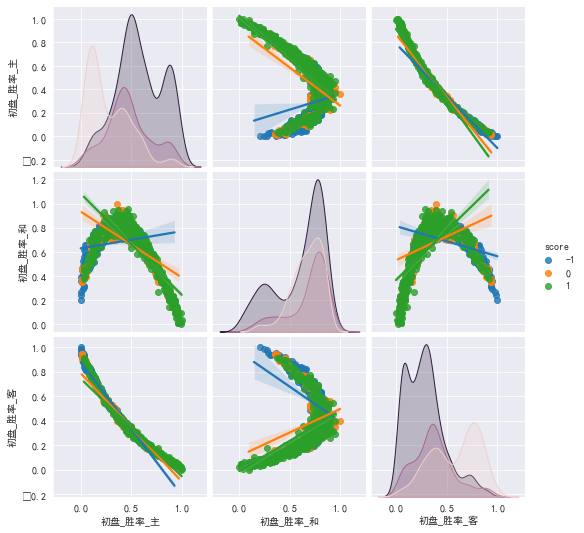

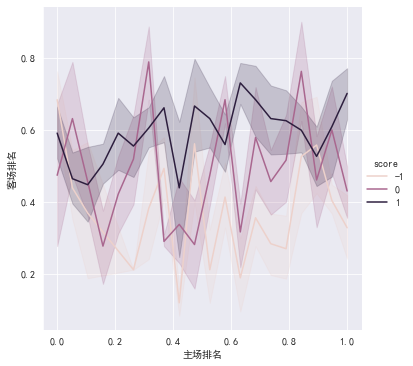

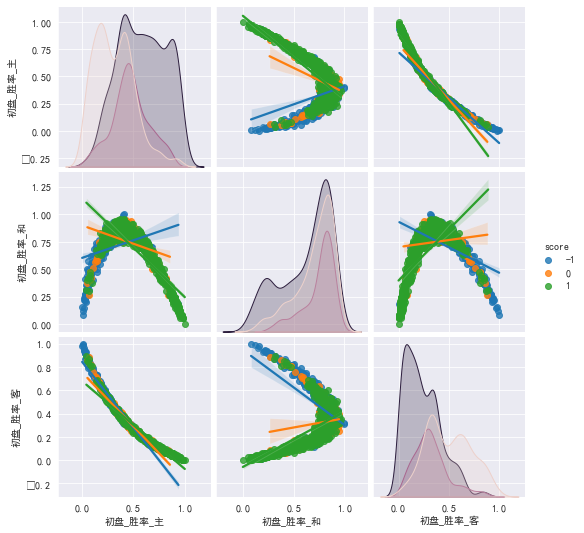

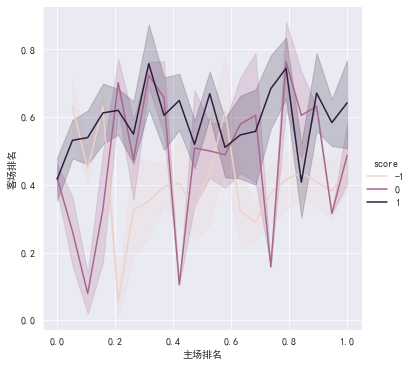

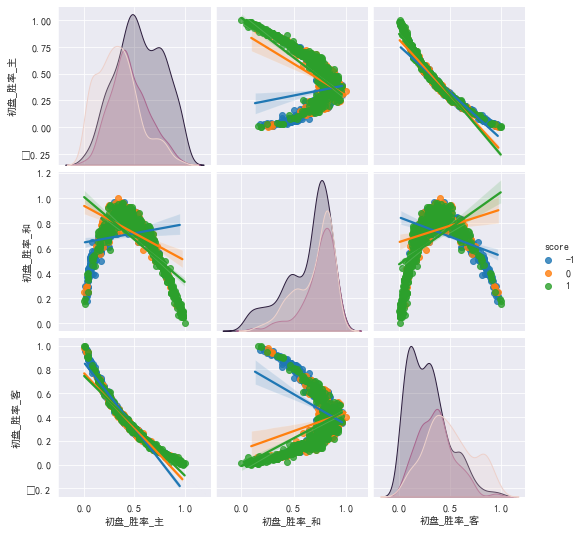

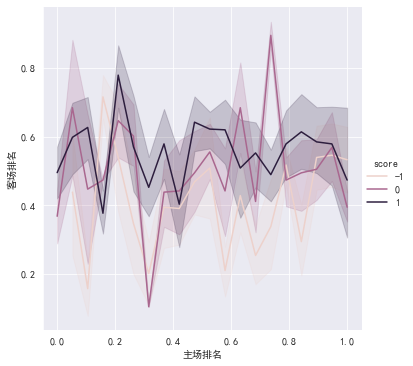

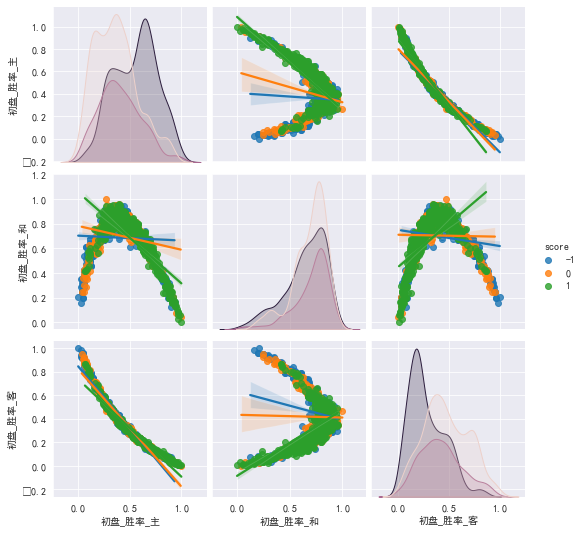

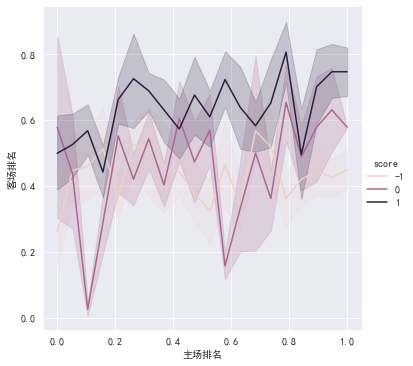

In [5]:
files = ['2010-2011四家公司数据.csv', '2011-2012四家公司数据.csv', '2012-2013四家公司数据.csv',
         '2013-2014四家公司数据.csv',
         '2014-2015四家公司数据.csv', '2015-2016四家公司数据.csv', '2016-2017四家公司数据.csv',
         '2018-2019四家公司数据.csv',
         '2019-2020四家公司数据.csv', '2020-2021四家公司数据.csv']
for i in files:
    data = cleaningData('{}'.format(i))
    mapping(data)
    svmTrain(data)